# Lista de Exercícios - Reinforcement Learning

NOME COMPLETO:

*   Juliano Bomtempo

MATRÍCULAS DOS INTEGRANTES DO GRUPO:

*   1931143003



**AVISOS**:

- **Mantenha a estrutura de enunciados e células de resposta da lista original na lista a ser entregue.**
- **Todas as análises e justificativas solicitadas devem estar acompanhadas de códigos e plots realizados.**
- **As listas deverão ser compartilhadas no e-mail nguerinjr@gmail.com .**
- **A entrega da lista será 7 dias após o término do curso. A depender da demanda um novo prazo pode ser acordado.**
- **Considerem, além dos slides e códigos apresentados em aula, tutoriais e os livros de referência para ajudar na realização dos exercícios.**

## Exercícios

### 1. Um exemplo clássico interessante de inferência Bayesiana envolve um conjunto de moeadas sorteadas dentro de uma urna. Cada moeda tem um viés diferente. Por consequência, probabilidades diferentes de sair cara / coroa. A partir de um sorteio da moeda e várias jogadas da moeda sorteada, é possível refinar o conhecimento probabilístico a respeito de qual moeda é a mais provável. **Esse foi um exemplo mostrado em sala de aula**. Neste exercício, o objetivo é implementar cenários similares variando alguns parâmetros e realizar análises sobre estes cenários.

###Funções utilizadas no exercicio.

In [1]:
# CÉLULAS DE CÓDIGO AQUI
# Comentarios da Inferencia de Bayes
# D = dados coletados (eventos)
# H = hipotese
# Teorema de Bayes = P(H|D) = P(D|H) x P(H) / P(D)
# A priori = P(H)
# A posteriori = P(H|D)
# Verossimilhanca = P(D|H)
# Verossimilhanca Marginal = P(D)

#vetor moedas[P_D_H-cara , P_D_H-coroa , qtde]
#*******************************************************
def urna_moedas(pesos,quantidades):
  modelo_urna = []
  for i in range(3):
    moeda = [pesos[i],(1-pesos[i]),quantidades[i]]
    modelo_urna.append(moeda)
  #fim do for
  return modelo_urna
#*******************************************************
def calcula_a_priori(urna):
  ma = urna[0]
  mb = urna[1]
  mc = urna[2]
  total_moedas = ma[2] + mb[2] + mc[2]
  p_abc = [0,0,0]
  p_abc[0] = (1 / total_moedas) * ma[2]
  p_abc[1] = (1 / total_moedas) * mb[2]
  p_abc[2] = (1 / total_moedas) * mc[2]
  return p_abc
#*******************************************************
def get_verossimilhanca(urna):
  ma = urna[0]
  mb = urna[1]
  mc = urna[2]
  p_d_abc = [ma[0],mb[0],mc[0]]
  return p_d_abc
#*******************************************************
def calcula_numerador_bayes(v_apriori,v_verossimilhanca):
  p_d = 0
  nb_abc = [0,0,0]
  for indice in range(3):
    nb_abc[indice] = (v_verossimilhanca[indice] * v_apriori[indice])
    p_d = p_d + (nb_abc[indice])
  #fim do for
  return nb_abc,p_d
#*******************************************************
def calcula_bayes(v_apriori,v_verossimilhanca,verossimilhanca_marginal):
  bayes_abc = [0,0,0]
  for indice in range(3):
    bayes_abc[indice] = (v_verossimilhanca[indice] * v_apriori[indice]) / verossimilhanca_marginal
  #fim do for
  return bayes_abc
#*******************************************************
def calcula_jogadas(indice,jogadas,verossimilhanca,apriori):
  numeradores = []
  contador_jogadas = 0
  for sorteado in jogadas:
    if (sorteado == 'c'):
      vero = verossimilhanca[indice]    
    else:
      vero = (1 - verossimilhanca[indice])

    if (len(numeradores) == 0):
      numerador = (apriori[indice] * vero)
    else:
      numerador = (numeradores[contador_jogadas - 1] * vero)
    numeradores.append(numerador)
    contador_jogadas += 1
  #fim do for  
  return numeradores
#*******************************************************



1.a) Implemente um código para avaliar um cenário onde há 3 tipos de moedas na urna: A, B e C. O evento D representa a saída de cara ao jogar uma moeda. A probabilidade de sair cara para cada uma das moedas é dada por: P(D|A) = 0.5, P(D|B) = 0.6, P(D|C) = 0.9. Considere que na urna haviam 3 moedas do tipo A, 4 moedas do tipo B e 1 moeda do tipo C. Suponha que uma moeda foi sorteda e depois essa moeda foi jogada 10 vezes. Os resultados foram: [CARA, CARA, CARA, COROA, COROA, CARA, CARA, CARA, CARA, COROA]. Exiba um plot representando o valor do numerador iterativo de Bayes de cada uma das moedas na medida em que uma nova jogada era realizada. Responda, a partir do gráfico: ouve mudanças sobre qual a moeda mais provavel na medida em que mais jogadas foram sendo feitas?

In [2]:
urna = urna_moedas([0.5,0.6,0.9],[3,4,1])
P_ABC = calcula_a_priori(urna)
P_D_ABC = get_verossimilhanca(urna)
NB_ABC,P_D = calcula_numerador_bayes(P_ABC,P_D_ABC)
Bayes_ABC = calcula_bayes(P_ABC,P_D_ABC,P_D)

print(P_ABC)
print(P_D_ABC)
print(P_D)
print(NB_ABC)
print(Bayes_ABC)

[0.375, 0.5, 0.125]
[0.5, 0.6, 0.9]
0.6
[0.1875, 0.3, 0.1125]
[0.3125, 0.5, 0.1875]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

moedas = ["Tipo A","Tipo B","Tipo C"]
cores = ['red','blue','green']

jogadas1a = ['c','c','c','k','k','c','c','c','c','k']
for indice in range(3):
  distro = calcula_jogadas(indice,jogadas1a,P_D_ABC,P_ABC) 
  plt.plot(distro,c=cores[indice],label=(moedas[indice]))
#fim do for

plt.ylabel('Numerador Bayes')
plt.xlabel('Jogadas')
plt.title('Numeradores de Bayes')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

<Figure size 640x480 with 1 Axes>

**Resposta**: *não houve mudanças gerais e a moeda do Tipo B é a mais provável de sair. Entretanto, considerando somente as moedas do Tipo A e C houve uma mudança de probabilidade na primeira jogada a favor do Tipo C e outra na terceira jogada a favor do Tipo A.*

  1.b) Faça uma versão diferente do cenário 1.a. Considere agora que há 5 moedas do tipo A, 5 moedas do tipo B e 1 moeda do tipo C. Suponha uma moeda foi jogada 100 vezes. Em todas as vezes saiu CARA. Faça o mesmo plot anterior para esse caso. Houve oscilação sobre qual é a moeda mais provável? Existe alguma situação específica nesse caso extremo de 100 CARAS com relação à qual a moeda mais provável de ter sido sorteada na urna na medida em que mais jogadas eram realizadas?

In [4]:
# CÉLULAS DE CÓDIGO AQUI
urna = urna_moedas([0.5,0.6,0.9],[5,5,1])
P_ABC = calcula_a_priori(urna)
P_D_ABC = get_verossimilhanca(urna)
NB_ABC,P_D = calcula_numerador_bayes(P_ABC,P_D_ABC)
Bayes_ABC = calcula_bayes(P_ABC,P_D_ABC,P_D)

print(P_ABC)
print(P_D_ABC)
print(P_D)
print(NB_ABC)
print(Bayes_ABC)

[0.4545454545454546, 0.4545454545454546, 0.09090909090909091]
[0.5, 0.6, 0.9]
0.5818181818181818
[0.2272727272727273, 0.27272727272727276, 0.08181818181818182]
[0.39062500000000006, 0.4687500000000001, 0.140625]


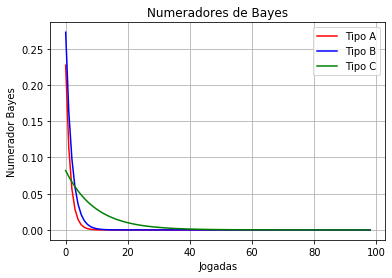

In [5]:
#preenchendo vetor de jogadas
jogadas1b = []
for indice in range(99):
  jogadas1b.append('c')
#fim do for

for indice in range(3):
  distro = calcula_jogadas(indice,jogadas1b,P_D_ABC,P_ABC) 
  plt.plot(distro,c=cores[indice],label=(moedas[indice]))
#fim do for

plt.ylabel('Numerador Bayes')
plt.xlabel('Jogadas')
plt.title('Numeradores de Bayes')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

**Resposta**: *sim houve oscilação a partir de aproximadamente 5 jogadas, mudando a probabilidade das moedas do Tipo B para o Tipo C. Isso porque o resultado sendo somente CARA a moeda do Tipo C é mais viciada com 90%. Também como pode ser observado a partir de 40 jogadas as probabilidades se aproximam e ficam praticamente as mesmas.*

  1.c) Simule um cenário com várias jogadas novamente. Nesse caso, para escolher entre cara e coroa, utilize uma distribuição de Bernoulli (no `numpy` seria uma Binomial representando `n=1` experimentos). Para tal, coloque a chance de sair cara como `0.6`. Nesse cenário estamos simulado que de fato a moeda B foi sorteada. Faça o plot do valor do numerado iterativo de Bayes com relação a cada moeda, na medida em que uma nova jogada é realizada. Verifique se, dadas as verossimilhanças, em algum momento a moeda `B` passa a aparecer como a mais provável. Mostre quantas jogadas foram necessárias para que houvesse a certeza desse fato.

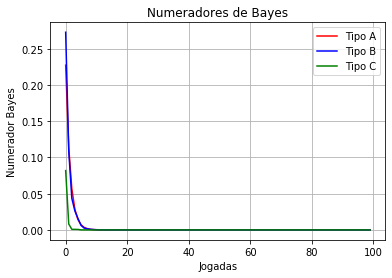

In [6]:
# CÉLULAS DE CÓDIGO AQUI

#sorteando randomicamente
jogadas_sorteio = np.random.binomial(size=100,n=1,p=0.6)
jogadas1c = []
for jogada in jogadas_sorteio:
  if (jogada == 1):
    jogadas1c.append('c')
  else:
    jogadas1c.append('k')
#fim do for

for indice in range(3):
  distro = calcula_jogadas(indice,jogadas1c,P_D_ABC,P_ABC) 
  plt.plot(distro,c=cores[indice],label=(moedas[indice]))
#fim do for

plt.ylabel('Numerador Bayes')
plt.xlabel('Jogadas')
plt.title('Numeradores de Bayes')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

**Resposta**: *neste caso, como as jogadas foram totalmente aleatórias, observa-se que a moeda do Tipo C foi a menos provável em espectro de jogadas, justamente pelo fato de possuir somente uma moeda na urna. A moeda do Tipo B passa a ser a mais provável a partir da segunda jogada.*

### 2. O k-armed bandit problem (também conhecido por multi-armed bandit problem) foi estudado em sala de aula. Considere os 3 exemplos apresentados no colab da aula para os exercícios abaixo.

Link do exercicio: https://colab.research.google.com/drive/1unzP9QyHF5z8a0oBDhetVnabLiuhpDc7

In [7]:
#Codigo do Exemplo 1
import collections, numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
#--------------------
class Bandit:
  """ Classe que define um bandido com recompensa seguindo uma distribuição 
      uniforme
  """

  def __init__(self, true_mean):
    """ Para caracterizar a distribuição uniforme, basta inicializar com média. 
    """
    self.q = true_mean
    self.Q_t = 0
    self.t = 0
    self.low = -0.5 + self.q
    self.high = 0.5 + self.q

  def pull(self):
    """ Método que define a interação com o bandido. A recompensa é resultante
        de uma distribuição uniforme de média especificada.
    """
    return np.random.uniform(low=self.low, high=self.high)

  def update(self, curr_reward):
    """ Método responsável por atualizar a estimação da expectativa da 
        recompensa
    """
    self.t += 1
    self.Q_t = self.Q_t + (1.0/self.t) * (curr_reward - self.Q_t)
#--------------------
def greedy_policy(bandits):
  """ Função responsável por escolher o bandido segundo uma estratégia greedy.
      Retorna o bandido correspondente à greedy action.
  """
  Q_values = [b.Q_t for b in bandits]
  greedy_index = np.argmax(Q_values)
  greedy_bandit = bandits[greedy_index]
  return greedy_bandit, greedy_index
#--------------------
def interact_with_bandit(bandit):
  """ Função que interage com um bandido. A interação envolve a coleta da 
      recompensa e a atualização da média estimada.
  """
  # Coleta a recompensa da interação
  reward = bandit.pull()

  # Atualiza a estimação da média
  bandit.update(reward)

  return reward
#--------------------
def run_greedy_bandits_experiment(bandits_array, num_iterations):
  """ Simula um cenário dos banditos com a escolha greedy de ação """
  rewards_array = np.empty(num_iterations)
  bandido_escolhido = np.empty(num_iterations, dtype=int)
  bandido_qt = np.empty(num_iterations, dtype=float)

  for n in np.arange(num_iterations):
    # Sempre há escolha da ação greedy.
    #print("Interacao:",n)
    greedy_bandit, greedy_index = greedy_policy(bandits_array)

    # Realiza a interação com o bandido que corresponde à ação greedy
    curr_reward = interact_with_bandit(greedy_bandit)
    #print("Bandido Selecionado:",greedy_bandit)
    #print("Valores do Bandido: Q:",greedy_bandit.q,"QT:",greedy_bandit.Q_t,"low:",greedy_bandit.low,"high:",greedy_bandit.high)
    #print("Recompensa:",curr_reward)

    rewards_array[n] = curr_reward
    bandido_escolhido[n] = greedy_index
    bandido_qt[n] = greedy_bandit.Q_t

  #return rewards_array
  return rewards_array, bandido_escolhido, bandido_qt
#--------------------
def main():
  """ Método principal """
  mean_array = [1.0, 2.0, 3.0, 4.0]
  num_iterations = 100
  bandits_array = list(map(lambda mean: Bandit(mean), mean_array))

  # Print do conhecimento que o agente tem de início
  print("Q_t inicial para todos os bandidos:")
  print(list(map(lambda b: b.Q_t, bandits_array)))

  rewards_array, bandidos_escolhidos = run_greedy_bandits_experiment(bandits_array, num_iterations)

  # Calculando a recompensa acumulada
  cumulative_reward = np.cumsum(rewards_array)

  # Fazendo a recompensa média considerando o número de iteraçẽos até aquele
  # ponto da recompensa acumulada
  mean_cumulative_reward = cumulative_reward / (np.arange(num_iterations) + 1)
  
  # Fazendo o plot da expectativa real dos banditos versus a recompensa média
  # acumulada
  plt.plot(mean_cumulative_reward)
  for b in bandits_array:
    plt.plot(np.ones(num_iterations) * b.q)
  plt.xscale('log')
  plt.show()

#main()
#--------------------

2.a) Considere o exemplo 1, onde a estratégia greedy foi utilizada e não houve nenhuma etapa preliminar de exploração. Mantenha os plots e os prints de informação já constantes no exemplo. Altere o código de forma que você consiga fazer um plot mostrando o valor histórico de `Q_t` para cada `t`, para cada um dos bandidos. Também faça um outro plot mostrando a quantidade acumulada de vezes que o agente tinha interagido com cada um dos bandidos para cada iteração `t`. A partir destes dois plots adicionais, é possível enxergar claramente o motivo pelo qual uma estratégia greedy não funciona sem uma exploração mínima? 

Bandidos Instanciados: [<__main__.Bandit object at 0x7fe744600590>, <__main__.Bandit object at 0x7fe744600fd0>, <__main__.Bandit object at 0x7fe7446002d0>, <__main__.Bandit object at 0x7fe744600f90>]
Q_t inicial para todos os bandidos:
[0, 0, 0, 0]


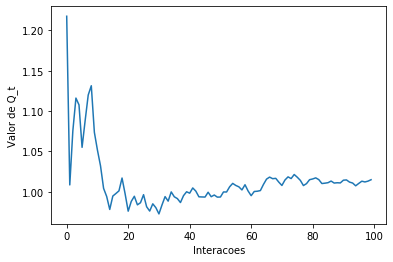

Estatisticas Bandidos Selecionados: [[  0]
 [100]]


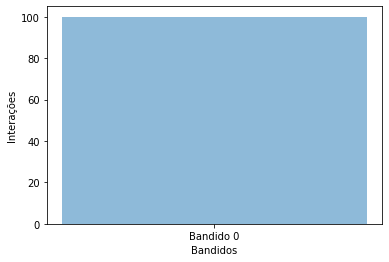

In [8]:
# CÉLULAS DE CÓDIGO AQUI
def main1_aluno():
  """ Método principal """
  mean_array = [1.0, 2.0, 3.0, 4.0]
  num_iterations = 100
  bandits_array = list(map(lambda mean: Bandit(mean), mean_array))
  print("Bandidos Instanciados:",bandits_array)

  # Print do conhecimento que o agente tem de início
  print("Q_t inicial para todos os bandidos:")
  print(list(map(lambda b: b.Q_t, bandits_array)))

  rewards_array, bandidos_selecionados, b_qt = run_greedy_bandits_experiment(bandits_array, num_iterations)

  # Calculando a recompensa acumulada
  cumulative_reward = np.cumsum(rewards_array)

  # Fazendo a recompensa média considerando o número de iteraçẽos até aquele
  # ponto da recompensa acumulada
  mean_cumulative_reward = cumulative_reward / (np.arange(num_iterations) + 1)
  
  plt.xlabel("Interacoes")
  plt.ylabel("Valor de Q_t")
  plt.plot(b_qt)
  plt.show()

  #Contando as interacoes com os bandidos
  bandidos_elementos, qtde = np.unique(bandidos_selecionados, return_counts=True)
  contagem_bandidos = (np.asarray((bandidos_elementos, qtde)))

  nomes_bandidos = []
  for i in contagem_bandidos[0]:
    nomes_bandidos.append("Bandido {}".format(i))

  plt.bar(contagem_bandidos[0],contagem_bandidos[1],align='center', alpha=0.5)
  print("Estatisticas Bandidos Selecionados:",contagem_bandidos)
  plt.xticks(contagem_bandidos[0],nomes_bandidos)
  plt.xlabel("Bandidos")
  plt.ylabel("Interações")
  plt.show()

main1_aluno()

**Resposta**: *como pode ser visto o bandido escolhido é sempre o primeiro bandido, com indice 0. Isso acontece porque os valores de Q_t são iniciados com ZERO. Como o valor da recompensa é sempre o valor máximo de Q_t, sempre a escolha será do primeiro bandido, já que na primeira interação o valor de Q_t é igual ao valor da recompensa, visto que inicia com ZERO. Sendo assim, nas interações seguintes será o maior (max) valor de Q_t e sempre será o primeiro bandido.*

2.b) Faça uma versão modificada do exemplo 3. Dessa vez considere 4 bandidos, onde a recompensa pela interação é dada por uma distribuição Gaussiana. As médias das recompensas são dadas por: `[1, 1.3, 1.8, 2.5]`. A variância de cada uma das gaussianas é `3`. Além dos plots já mostrados no exemplo 3, considere também os dois plots adicionais sugeridos no item 2.a. Rode o experimento 4 vezes e exiba os gráficos de cada caso. Descreva o comportamento do agente a partir das informações dos gráficos em cada caso.

OBS.: para esse cenário, considere que houve 2 interações com cada agente na etapa exploratória. Posteriormente, na etapa greedy, foram realizadas 10000 interações.

In [9]:
# CÉLULAS DE CÓDIGO AQUI
class BandidoNormal:
  """ Classe do bandido da distribuicao Normal (Gauss)
  """
#--------------------  
  def __init__(self,dp,m):
    """ Parametros:
        m = media
        dp = desvio padrao
    """
    self.q = m 
    self.n = m
    self.p = dp
    self.Q_t = 0
    self.t = 0
  #fim def
#--------------------
  def pull(self):
    """ Calculo da recompensa com desvio padrao e media usando a funcao "normal" do NumPy.
    """
    return np.random.normal(self.n, self.p)
  #fim def
#--------------------
  def update(self, curr_reward):
    """ Atualizando valor de Q_t da expectativa.
    """
    self.t += 1
    self.Q_t = self.Q_t + (1.0/self.t) * (curr_reward - self.Q_t)
  #fim def
#fim da classe
#--------------------
def politica_greedy(bandidos):
  """ Função responsável por escolher o bandido segundo uma estratégia greedy.
      Retorna o bandido correspondente à greedy action. Funcao igual a do exercicio
  """
  Q_values = [b.Q_t for b in bandidos]
  greedy_index = np.argmax(Q_values)
  greedy_bandit = bandidos[greedy_index]
  return greedy_bandit, greedy_index
#--------------------
def interacao_bandido(bandido):
  """ Interacao com bandido com exploracao inicial
  """
  recompensa = bandido.pull()
  bandido.update(recompensa)
  return recompensa
#fim def
#--------------------
def exploracao_inicial(bandidos, interacoes):
  """ Exploracao inicial de cada bandido.
  """
  for bandido in bandidos:
    for n in range(interacoes):
      interacao_bandido(bandido)
    #fim do for
  #fim do for
#fim do def
#---------------------
def greedy_com_exploracao_inicial(bandidos, interacoes, interacoes_exploracao):
  historico_recompensas = {}
    
  for bandido in range(len(bandidos)):
    historico_recompensas[bandido] = []

  # Valores de Q_t com a exploracao inicial
  exploracao_inicial(bandidos, interacoes_exploracao)
  print("Valores de Q_t para exploracao inicial:")
  print(list(map(lambda b: b.Q_t, bandidos)))

  bandidos_selecionados = np.empty(interacoes, dtype=int)
  bandidos_recompensas = np.empty(interacoes, dtype=float)

  for n in np.arange(interacoes):
    # Sempre há escolha da ação greedy.
    bandido_ativo, bandido_escolhido = politica_greedy(bandidos)

    # Realiza a interação com o bandido que corresponde à ação greedy
    recompensa = interacao_bandido(bandido_ativo)

    bandidos_recompensas[n] = recompensa
    bandidos_selecionados[n] = bandido_escolhido
    
    for bandido in range(len(bandidos)):
        historico_recompensas[bandido].append(bandidos[bandido].Q_t)
     #fim do for
  #fim do for
  
  return bandidos_recompensas, bandidos_selecionados, historico_recompensas
#fim def


*** Experimento 1 ***
Valores de Q_t para exploracao inicial:
[0.24239229948446972, -0.7306931464231827, 2.4272110651854115, 1.8236416480681448]


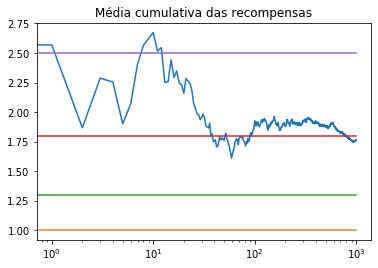

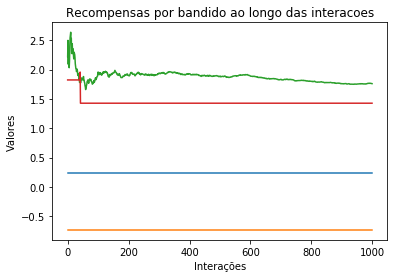

Estatisticas Bandidos Selecionados: [[  2   3]
 [997   3]]


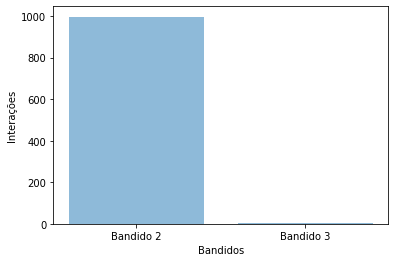

*** Experimento 2 ***
Valores de Q_t para exploracao inicial:
[0.8396881585546159, 0.5857601687748677, 1.9489182292973495, 1.8560048840852263]


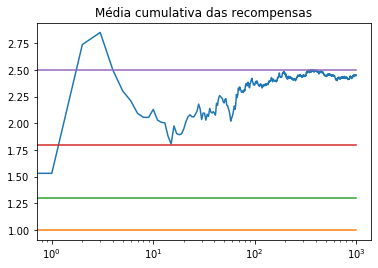

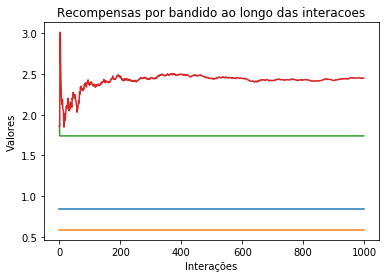

Estatisticas Bandidos Selecionados: [[  2   3]
 [  2 998]]


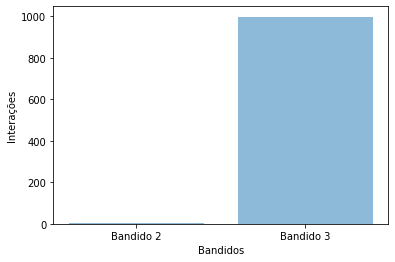

*** Experimento 3 ***
Valores de Q_t para exploracao inicial:
[-0.07982701153723182, 2.7663733137231503, 1.953849562760389, 3.0417433250927943]


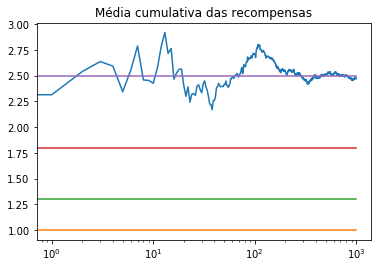

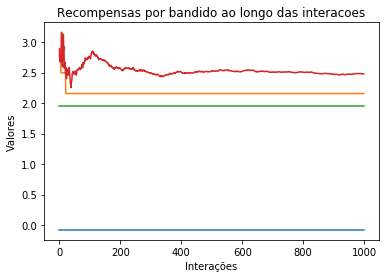

Estatisticas Bandidos Selecionados: [[  1   3]
 [  5 995]]


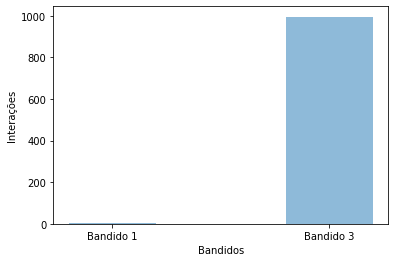

*** Experimento 4 ***
Valores de Q_t para exploracao inicial:
[-0.14767986063410898, 1.139632047938448, 0.8359548750839711, 2.0781433626809633]


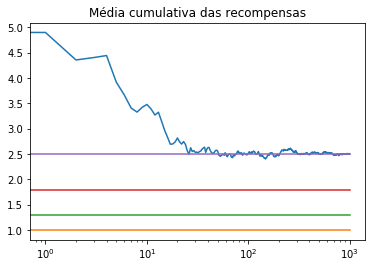

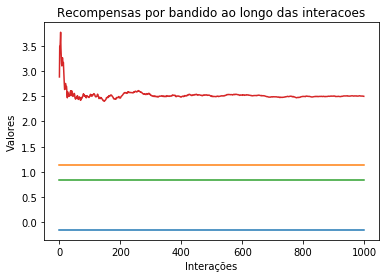

Estatisticas Bandidos Selecionados: [[   3]
 [1000]]


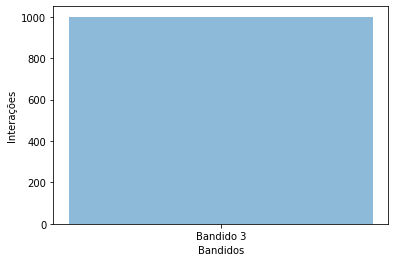

In [10]:
def main2_aluno():
  #calculo do desvio padrao que eh a raiz quadrada da variancia: 
  vdp = 3 ** 0.5
  vmedias = [1, 1.3, 1.8, 2.5]
  interacoes_iniciais = 2
  interacoes = 1000
  bandits = list(map(lambda media: BandidoNormal(m=media, dp=vdp), vmedias))

  #rewards_array, index_array, rewards_in_time, iterations_in_time = greedy_com_exploracao_inicial(bandits, interacoes, interacoes_iniciais)
  rewards_array, bandidos_selecionados, dic_recompensas = greedy_com_exploracao_inicial(bandits, interacoes, interacoes_iniciais)

  # Calculando a recompensa acumulada
  cumulative_reward = np.cumsum(rewards_array)

  # Fazendo a recompensa média considerando o número de iteraçẽos até aquele
  # ponto da recompensa acumulada
  mean_cumulative_reward = cumulative_reward / (np.arange(interacoes) + 1)
  
  # Fazendo print das interações iniciais do agente
  #print("Bandidos Selecionados:", bandidos_selecionados)

  # Fazendo o plot da expectativa real dos banditos versus a recompensa média
  # acumulada
  plt.title("Média cumulativa das recompensas") 
  plt.plot(mean_cumulative_reward)
  for b in bandits:
    plt.plot(np.ones(interacoes) * b.q)
  plt.xscale('log')
  plt.show()

  plt.title("Recompensas por bandido ao longo das interacoes")  
  for bandido in range(len(bandits)):
    plt.plot(np.ones(interacoes) * dic_recompensas[bandido])
  #fim do for
  plt.xlabel("Interações")
  plt.ylabel("Valores")
  plt.show()

  #Contando as interacoes com os bandidos
  bandidos_elementos, qtde = np.unique(bandidos_selecionados, return_counts=True)
  contagem_bandidos = (np.asarray((bandidos_elementos, qtde)))

  nomes_bandidos = []
  for i in contagem_bandidos[0]:
    nomes_bandidos.append("Bandido {}".format(i))
  #fim do for

  plt.bar(contagem_bandidos[0],contagem_bandidos[1],align='center', alpha=0.5)
  print("Estatisticas Bandidos Selecionados:",contagem_bandidos)
  plt.xticks(contagem_bandidos[0],nomes_bandidos)
  plt.xlabel("Bandidos")
  plt.ylabel("Interações")
  plt.show()

#Executando o experimento 4x
for experimento in range(1,5):
  print("*** Experimento {} ***".format(experimento))
  main2_aluno()

**Resposta**: *como pode ser visto mesmo usando a distribuição Normal os bandidos escolhidos acabam sendo praticamente os mesmos, com uma ou outra pequena variação. Isso acontece porque mesmo fazendo uma exploração inicial, os valores de Q_t são coletados em seu valor máximo.*

2.c) O algoritmo epsilon greedy permite aleatoriamente oscilar entre exploration e exploitation. Dessa maneira, o valor de epsilon induz o grau de exploration do agente. Implemente uma versão epsilon greedy do cenário em 2.b. Considere os mesmos conjuntos de plots. Dessa vez, rode o experimento 5 vezes variando o valor de epsilon dentre os seguintes valores: [0.1, 0.2, 0.3, 0.4, 0.5]. Rode o código e disserte: é possível notar variações no comportamento do agente, na medida em que diferentes epsilons são utilizados?

In [11]:
# CÉLULAS DE CÓDIGO AQUI
#-------------------------------------
#Funcao que define se eh por exploracao ou nao
def exploracao(epsilon):
  return np.random.choice([True, False],1,p=[epsilon, 1 - epsilon])[0]
#fim def
#-------------------------------------
def politica_nao_greedy(bandidos):
  # Selecionando aleatoriamente os bandidos
  non_greedy_index = np.random.randint(0,len(bandidos))
  return bandidos[non_greedy_index], non_greedy_index
#fim def
#-------------------------------------
def politica_epsilon(bandidos, epsilon):
  if exploracao(epsilon):
    return politica_nao_greedy(bandidos)
  else:
    return politica_greedy(bandidos)
#fim def
#-------------------------------------
def exploracao_epsilon(bandidos, interacoes, interacoes_exploracao, epsilon):
  historico_recompensas = {}
    
  for bandido in range(len(bandidos)):
    historico_recompensas[bandido] = []
  #fim do for

  # Valores de Q_t com a exploracao inicial
  exploracao_inicial(bandidos, interacoes_exploracao)
  print("Valores de Q_t para exploracao inicial:")
  print(list(map(lambda b: b.Q_t, bandidos)))

  bandidos_selecionados = np.empty(interacoes, dtype=int)
  bandidos_recompensas = np.empty(interacoes, dtype=float)

  for n in np.arange(interacoes):
    # Sempre há escolha da ação greedy.
    bandido_ativo, bandido_escolhido = politica_epsilon(bandidos, epsilon)

    # Realiza a interação com o bandido que corresponde à ação greedy
    recompensa = interacao_bandido(bandido_ativo)

    bandidos_recompensas[n] = recompensa
    bandidos_selecionados[n] = bandido_escolhido
    
    for bandido in range(len(bandidos)):
        historico_recompensas[bandido].append(bandidos[bandido].Q_t)
     #fim do for
  #fim do for
  return bandidos_recompensas, bandidos_selecionados, historico_recompensas
#-------------------------------------

*** Experimento para E igual a : 0.1 ***
Valores de Q_t para exploracao inicial:
[2.1193167274980196, 1.1562570637927831, 2.118554678321918, 3.1162157904521344]


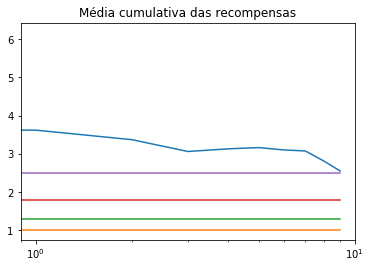

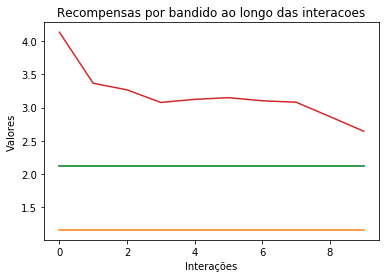

Estatisticas Bandidos Selecionados: [[ 3]
 [10]]


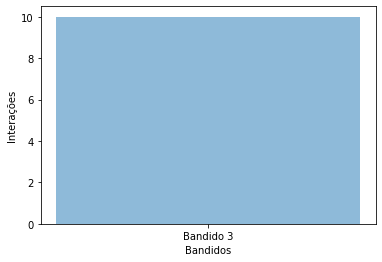

*** Experimento para E igual a : 0.2 ***
Valores de Q_t para exploracao inicial:
[0.9385765710345965, 0.9238518949394328, 1.6989872614358086, 2.5116098784310745]


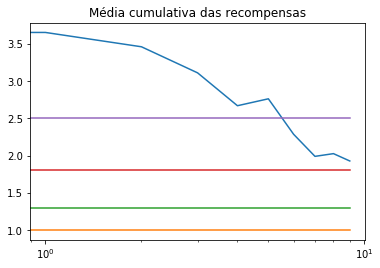

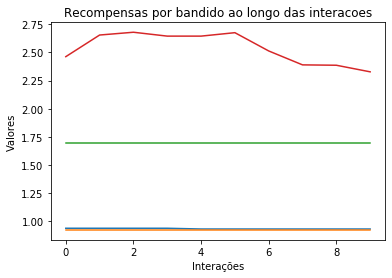

Estatisticas Bandidos Selecionados: [[0 3]
 [1 9]]


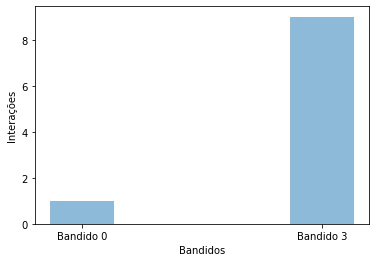

*** Experimento para E igual a : 0.3 ***
Valores de Q_t para exploracao inicial:
[1.1481991003451881, 0.825905393693065, 1.6761030276882896, 2.2323125046429984]


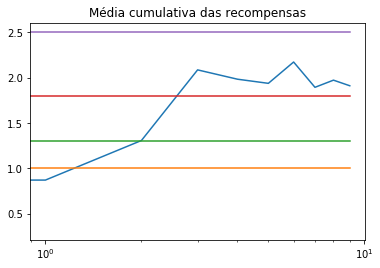

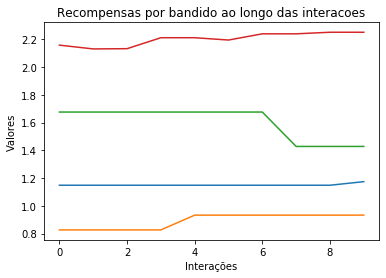

Estatisticas Bandidos Selecionados: [[0 1 2 3]
 [1 1 1 7]]


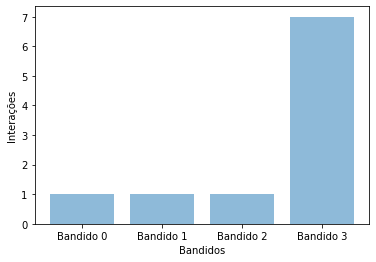

*** Experimento para E igual a : 0.4 ***
Valores de Q_t para exploracao inicial:
[1.5003500040471494, 1.103552178598027, 1.9420048755476103, 2.2762236584139246]


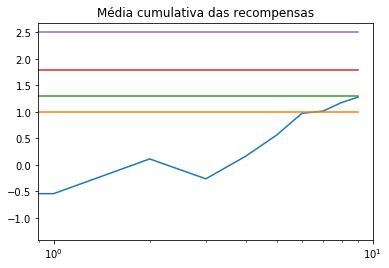

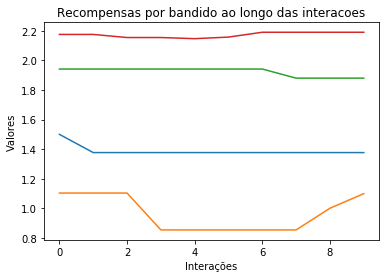

Estatisticas Bandidos Selecionados: [[0 1 2 3]
 [1 3 1 5]]


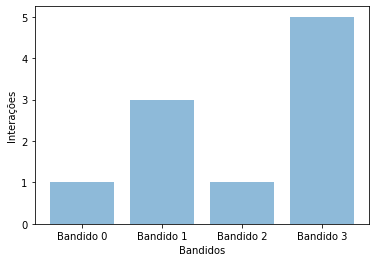

*** Experimento para E igual a : 0.5 ***
Valores de Q_t para exploracao inicial:
[1.3926316310881746, 1.2004557072275488, 2.165142987574988, 2.3080244129425656]


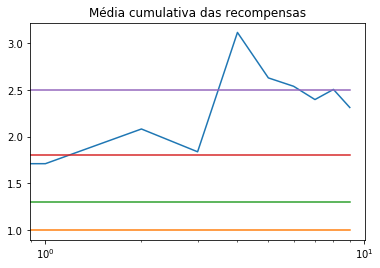

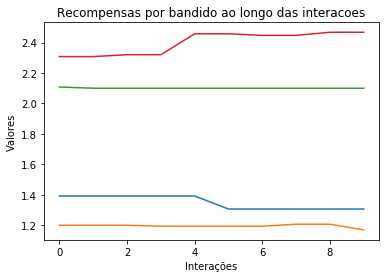

Estatisticas Bandidos Selecionados: [[0 1 2 3]
 [1 3 2 4]]


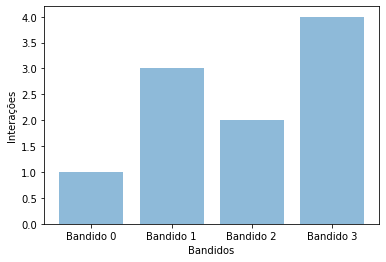

In [12]:
def main3_aluno():
  #calculo do desvio padrao que eh a raiz quadrada da variancia: 
  vdp = 3 ** 0.5
  vmedias = [1, 1.3, 1.8, 2.5]
  interacoes_iniciais = 2
  interacoes = 10
  epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]
  bandits = list(map(lambda media: BandidoNormal(m=media, dp=vdp), vmedias))

  for ep in epsilons:
    print("*** Experimento para E igual a : {} ***".format(ep))
    rewards_array, bandidos_selecionados, dic_recompensas = exploracao_epsilon(bandits, interacoes, interacoes_iniciais, ep)
  
    # Calculando a recompensa acumulada
    cumulative_reward = np.cumsum(rewards_array)

    # Fazendo a recompensa média considerando o número de iteraçẽos até aquele
    # ponto da recompensa acumulada
    mean_cumulative_reward = cumulative_reward / (np.arange(interacoes) + 1)
  
    # Fazendo print das interações iniciais do agente
    #print("Bandidos Selecionados:", bandidos_selecionados)

    # Fazendo o plot da expectativa real dos banditos versus a recompensa média
    # acumulada
    plt.title("Média cumulativa das recompensas") 
    plt.plot(mean_cumulative_reward)
    for b in bandits:
      plt.plot(np.ones(interacoes) * b.q)
    #fim do for
    plt.xscale('log')
    plt.show()

    plt.title("Recompensas por bandido ao longo das interacoes")  
    for bandido in range(len(bandits)):
      plt.plot(np.ones(interacoes) * dic_recompensas[bandido])
    #fim do for
    plt.xlabel("Interações")
    plt.ylabel("Valores")
    plt.show()

    #Contando as interacoes com os bandidos
    bandidos_elementos, qtde = np.unique(bandidos_selecionados, return_counts=True)
    contagem_bandidos = (np.asarray((bandidos_elementos, qtde)))

    nomes_bandidos = []
    for i in contagem_bandidos[0]:
      nomes_bandidos.append("Bandido {}".format(i))
    #fim do for

    plt.bar(contagem_bandidos[0],contagem_bandidos[1],align='center', alpha=0.5)
    print("Estatisticas Bandidos Selecionados:",contagem_bandidos)
    plt.xticks(contagem_bandidos[0],nomes_bandidos)
    plt.xlabel("Bandidos")
    plt.ylabel("Interações")
    plt.show()
  #fim do for epsilons

main3_aluno()

**Resposta**: *Sim, é possível verificar que ao longo dos valores de Epsilon (E) outros bandidos foram selecionados, mesmo sendo componente aleatório em detrimento das seleções de bandidos Greedy. Mesmo assim, dado a aleatoriedade não se garante uniformidade na escolha dos bandidos.*


2.d) Implemente o cenário do algoritmo 2.c com algumas modificações. Dessa vez utilize a estratégia de Upper-Confidence-Bound. Exiba os resultados dos plots de 4 experimentos. Disserte a respeito das diferentes entre os cenários apresentados, além das diferenças de comportamento do agente com relação aos cenários anteriores.

In [13]:
# CÉLULAS DE CÓDIGO AQUI
import math
#---------------------------------------------
def calcula_ucb(bandido, fator, N_t):
  return ((np.log(bandido.t)/N_t) ** 0.5) * fator + bandido.Q_t
#fim def
#---------------------------------------------
def politica_ucb(bandidos, fator):
  valores_t = [bandido.t for bandido in bandidos]
  soma_t = np.sum(valores_t)  
  valores_ucb = [calcula_ucb(bandido, fator, soma_t) for bandido in bandidos]
  bandido_escolhido = np.argmax(valores_ucb)
  bandido_ucb = bandidos[bandido_escolhido]
  return bandido_ucb, bandido_escolhido
#fim def
#---------------------------------------------
def exploracao_ucb(bandidos, interacoes, fator):
  historico_recompensas = {}
    
  for bandido in range(len(bandidos)):
    historico_recompensas[bandido] = []
  #fim do for

  print("Valores de Q_t para exploracao inicial:")
  print(list(map(lambda b: b.Q_t, bandidos)))

  bandidos_selecionados = np.empty(interacoes, dtype=int)
  bandidos_recompensas = np.empty(interacoes, dtype=float)

  for n in np.arange(interacoes):
    # Sempre há escolha da ação greedy.
    bandido_ativo, bandido_escolhido = politica_ucb(bandidos, fator)

    # Realiza a interação com o bandido que corresponde à ação greedy
    recompensa = interacao_bandido(bandido_ativo)

    bandidos_recompensas[n] = recompensa
    bandidos_selecionados[n] = bandido_escolhido
    
    for bandido in range(len(bandidos)):
        historico_recompensas[bandido].append(bandidos[bandido].Q_t)
     #fim do for
  #fim do for
  return bandidos_recompensas, bandidos_selecionados, historico_recompensas

*** Experimento 1 ***
Valores de Q_t para exploracao inicial:
[0, 0, 0, 0]


/home/juliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


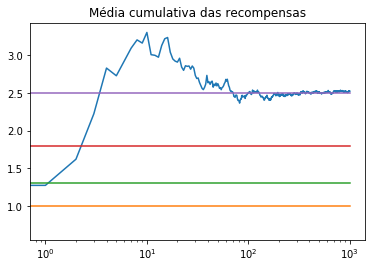

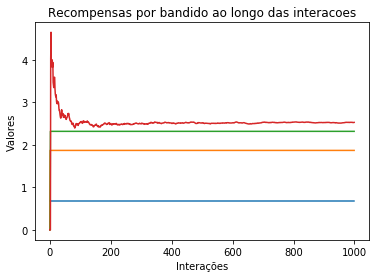

Estatisticas Bandidos Selecionados: [[  0   1   2   3]
 [  1   1   1 997]]


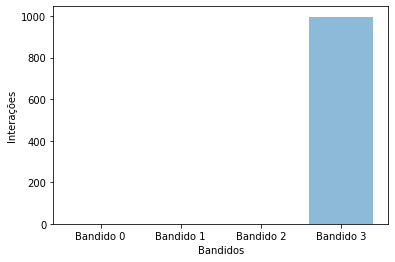

*** Experimento 2 ***
Valores de Q_t para exploracao inicial:
[0, 0, 0, 0]


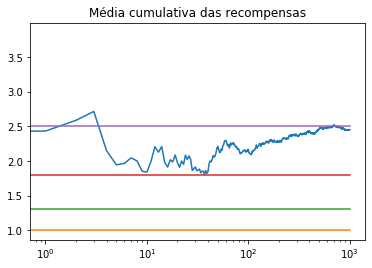

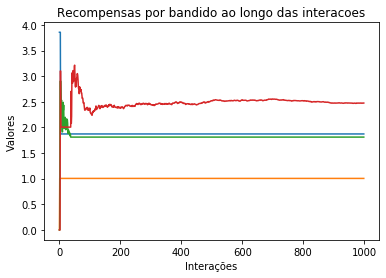

Estatisticas Bandidos Selecionados: [[  0   1   2   3]
 [  2   1  33 964]]


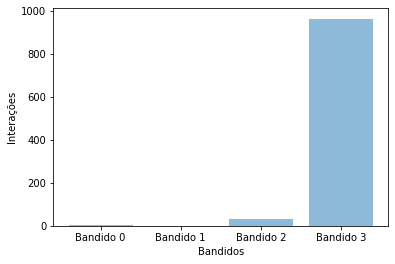

*** Experimento 3 ***
Valores de Q_t para exploracao inicial:
[0, 0, 0, 0]


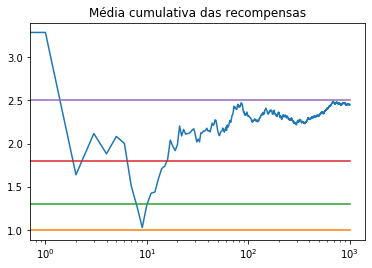

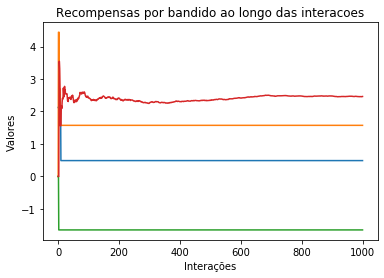

Estatisticas Bandidos Selecionados: [[  0   1   2   3]
 [  2   3   1 994]]


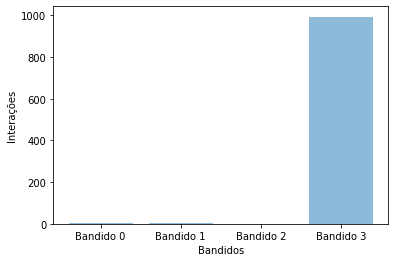

*** Experimento 4 ***
Valores de Q_t para exploracao inicial:
[0, 0, 0, 0]


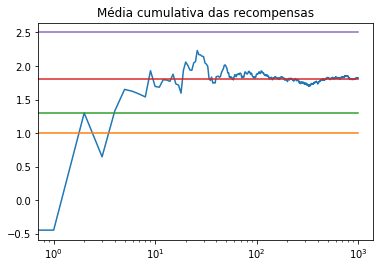

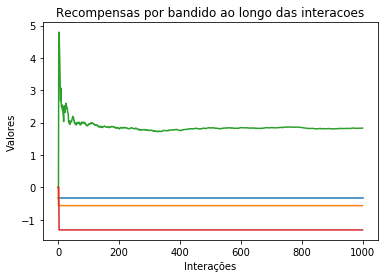

Estatisticas Bandidos Selecionados: [[  0   1   2   3]
 [  1   1 997   1]]


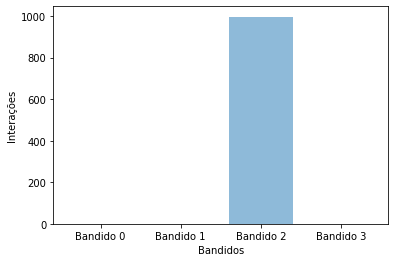

In [14]:
def main4_aluno():
  #calculo do desvio padrao que eh a raiz quadrada da variancia: 
  vdp = 3 ** 0.5
  vmedias = [1, 1.3, 1.8, 2.5]
  interacoes = 1000
  fator = 1
  bandits = list(map(lambda media: BandidoNormal(m=media, dp=vdp), vmedias))

  rewards_array, bandidos_selecionados, dic_recompensas = exploracao_ucb(bandits, interacoes, fator)
  
  # Calculando a recompensa acumulada
  cumulative_reward = np.cumsum(rewards_array)

  # Fazendo a recompensa média considerando o número de iteraçẽos até aquele
  # ponto da recompensa acumulada
  mean_cumulative_reward = cumulative_reward / (np.arange(interacoes) + 1)
  
  # Fazendo print das interações iniciais do agente
  #print("Bandidos Selecionados:", bandidos_selecionados)

  # Fazendo o plot da expectativa real dos banditos versus a recompensa média
  # acumulada
  plt.title("Média cumulativa das recompensas") 
  plt.plot(mean_cumulative_reward)
  for b in bandits:
    plt.plot(np.ones(interacoes) * b.q)
  #fim do for
  plt.xscale('log')
  plt.show()

  plt.title("Recompensas por bandido ao longo das interacoes")  
  for bandido in range(len(bandits)):
    plt.plot(np.ones(interacoes) * dic_recompensas[bandido])
  #fim do for
  plt.xlabel("Interações")
  plt.ylabel("Valores")
  plt.show()

  #Contando as interacoes com os bandidos
  bandidos_elementos, qtde = np.unique(bandidos_selecionados, return_counts=True)
  contagem_bandidos = (np.asarray((bandidos_elementos, qtde)))

  nomes_bandidos = []
  for i in contagem_bandidos[0]:
    nomes_bandidos.append("Bandido {}".format(i))
  #fim do for
  plt.bar(contagem_bandidos[0],contagem_bandidos[1],align='center', alpha=0.5)
  print("Estatisticas Bandidos Selecionados:",contagem_bandidos)
  plt.xticks(contagem_bandidos[0],nomes_bandidos)
  plt.xlabel("Bandidos")
  plt.ylabel("Interações")
  plt.show()

#Executando o experimento 4x
for experimento in range(1,5):
  print("*** Experimento {} ***".format(experimento))
  main4_aluno()

**Resposta**: *Neste caso, mesmo usando a estratégia de Upper Confidence Bound, que é a seleção do agente (bandido) a partir de um política de otimismo, mesmo que exista algum grau de incerteza na escolha, os bandidos escolhidos foram tendenciosos e a heurística acabou privilegiando um bandido em detrimento de outros.*

### 3. Neste exercício serão explorados cenários a respeito do gridworld. 

3.1 Faça uma implementação do primeiro gridworld apresentado em sala de aula, onde há um estado terminal de recompensa +100 e um estado terminal de recompensa -100. Faça com que o algoritmo realize 100 passagens por todo o grid. Após, faça um print formatado da função de valor em todas as posições do grid. Também faça um print formatado do grid com política greedy (uma matriz com strings representando quais as melhores ações em cada estado).

A política greedy ainda é a mesma da que foi mostrada no exemplo em sala de aula? Pode-se dizer que com 3 passagens por todo o grid, já é possível encontrar a política ótima?

In [15]:
import math
import numpy as np

NUM_WHOLE_WALKS = 100
GRID_LINES = 3
GRID_COLUMNS = 4
GAMMA = 1

#Essas são as recompensas em cada posição.
grid_r = [[ 5, 1, -4, 0],
          [ 3, 0,  2, 0],
          [ 1, 0, -5, 2]]

#Essa é a politica possível de cada movimento
p_up = 0.8
p_left = 0.1
p_right = 0.1

#Função que imprimir o caminho formatado
def print_grid_path(grid):
    grid_lin = len(grid[0:])
    grid_col = len(grid[0])
    
    grid_path = [['' for x in range(grid_col)] for y in range(grid_lin)]
    
    for i in range(len(grid[0:])):
        for j in range(len(grid[0])):
            if not((i==1 and j==1) or (i==0 and j==3) or (i==1 and j==3)):
                r_up =    grid[i-1][j] if i > 0 and not(i==2 and j==1) else -math.inf
                r_left =  grid[i][j-1] if j > 0 and not(i==1 and j==2) else -math.inf
                r_rigth = grid[i][j+1] if (j < grid_col - 1) and not(i==1 and j==0) else -math.inf
                
                r_list = [r_up,  r_left, r_rigth]
                dir_list = ['↑','←','→']
                grid_path[i][j] = dir_list[np.argmax(r_list)]
    grid_path[1][1] = 'x'
    grid_path[0][3] = '+'
    grid_path[1][3] = '-'
    print(np.round(grid, 2))
    print()
    print('Caminho do grid:')
    print(grid_path[0])
    print(grid_path[1])
    print(grid_path[2])
    print()
    
#Passagens
grid_v = np.zeros((GRID_LINES, GRID_COLUMNS))
grid_v_3 = np.zeros((GRID_LINES, GRID_COLUMNS))
grid_v[0][3] = 100
grid_v[1][3] = -100

for num in range(NUM_WHOLE_WALKS):
    #Calculo do grid_v
    grid_v_temp = np.zeros((GRID_LINES, GRID_COLUMNS))
    grid_v_temp[0][3] = 100
    grid_v_temp[1][3] = -100

    for i in range(GRID_LINES):
        for j in range(GRID_COLUMNS):
            if not((i==1 and j==1) or (i==0 and j==3) or (i==1 and j==3)):
                up_grid = p_up * grid_v[i-1][j] if i > 0 and not(i==2 and j==1) else 0
                left_grid = p_left * grid_v[i][j - 1] if j > 0 and not(i==1 and j==2) else 0
                right_grid = p_right * grid_v[i][j + 1] if ((j < GRID_COLUMNS - 1) and not(i==1 and j==0)) else 0

                all_dirs = up_grid + left_grid + right_grid

                grid_v_temp[i][j] = grid_r[i][j] + (GAMMA * all_dirs)

    #grid_v atualizado com grid_v_temp
    grid_v = grid_v_temp
    if num == 2:
        grid_v_3 = grid_v

print('Grid_v com 100 passagens:')
print_grid_path(grid_v)
print('Grid_v com 3 passagens:')
print_grid_path(grid_v_3)

Grid_v com 100 passagens:
[[   5.21    2.14    6.21  100.  ]
 [   7.17    0.     -3.03 -100.  ]
 [   6.65   -0.88  -15.47  -79.55]]

Caminho do grid:
['→', '→', '→', '+']
['↑', 'x', '↑', '-']
['↑', '←', '←', '←']

Grid_v com 3 passagens:
[[   5.21    2.12    6.21  100.  ]
 [   7.08    0.     -3.12 -100.  ]
 [   6.56   -1.58  -15.45  -79.92]]

Caminho do grid:
['→', '→', '→', '+']
['↑', 'x', '↑', '-']
['↑', '←', '←', '←']



**Resposta**: *Sim, a política greedy é a mesma mostrada no exemplo em sala de aula, e sim com as 3 passagens pelo o grid já foi possível encontrar a política ótima.*

3.2 Mude o cenário do exercício 3.1. No exemplo em questão era desconsiderada a possibilidade de ações que levem o agente para fora do grid. Mude esse cenário e passe a considerar que o agente pode tentar sair do grid e, caso isso aconteça, haverá uma recompensa de -2. Além disso, nestes casos, o estado do agente não muda.

Faça o print formatado das mesmas matrizes representando o grid com relação à função de valor e à política greedy. Exiba o cenário com 3 e 100 passagens por todo o grid. Há diferenças notáveis na função de valor com relação ao exercício 3.1 e o exemplo em sala de aula? E na política greedy?

In [16]:
grid_v = np.zeros((GRID_LINES, GRID_COLUMNS))
grid_v_3 = np.zeros((GRID_LINES, GRID_COLUMNS))
grid_v[0][3] = 100
grid_v[1][3] = -100

for num in range(NUM_WHOLE_WALKS):
    #grid usado durante o calculo do grid_v
    grid_v_temp = np.zeros((GRID_LINES, GRID_COLUMNS))
    grid_v_temp[0][3] = 100
    grid_v_temp[1][3] = -100

    for i in range(GRID_LINES):
        for j in range(GRID_COLUMNS):
            if not((i==1 and j==1) or (i==0 and j==3) or (i==1 and j==3)):
                if i > 0:
                    if not (i==2 and j==1):
                        up_grid = p_up * grid_v[i-1][j]
                    else:
                        up_grid = 0
                else:
                    up_grid = p_up * (-2) #Recompensa
                    
                if j > 0:
                    if not (i==1 and j==2):
                        left_grid = p_left * grid_v[i][j - 1]
                    else:
                        left_grid = 0 
                else:
                    left_grid = p_left * (-2) #Recompensa
                    
                if (j < GRID_COLUMNS - 1):
                    if not (i==1 and j==0):
                        right_grid = p_right * grid_v[i][j + 1]
                    else:
                        right_grid = 0 
                else:
                    right_grid = p_right * (-2) #Recompensa 
                 

                all_dirs = up_grid + left_grid + right_grid

                grid_v_temp[i][j] = grid_r[i][j] + (GAMMA * all_dirs)

    grid_v = grid_v_temp
    if num == 2:
        grid_v_3 = grid_v

print('Grid_v com 100 passagens:')
print_grid_path(grid_v)
print('Grid_v com 3 passagens:')
print_grid_path(grid_v_3)

Grid_v com 100 passagens:
[[   3.22    0.16    4.42  100.  ]
 [   5.37    0.     -4.47 -100.  ]
 [   4.98   -1.17  -16.68  -79.87]]

Caminho do grid:
['→', '→', '→', '+']
['↑', 'x', '↑', '-']
['↑', '←', '←', '←']

Grid_v com 3 passagens:
[[   3.22    0.15    4.42  100.  ]
 [   5.31    0.     -4.53 -100.  ]
 [   5.05   -1.62  -16.5   -80.12]]

Caminho do grid:
['→', '→', '→', '+']
['↑', 'x', '↑', '-']
['↑', '←', '←', '←']



**Resposta**: *Não há diferenças notáveis na função de valor com relação ao exercício 3.1 e o exemplo em sala de aula e na política greedy.*

3.3 Implemente o cenário do exercício 3.2 via método de Monte Carlo. Todavia, defina que as recompensas serão 0 nos estados válidos. Além disso serão -1 para ações que levem o agente para fora do grid (mantendo o estado inalterado). Por fim, especifique que os dois estados terminais terão recompensa +10 e -5, respectivamente. 

Rode 5 episódios e exiba tanto a função de valor para o grid quanto a política greedy. Compare com os resutados obtidos ao considerar o exercício 3.2

- No exercício 3.3 podem desconsiderar o valor -1 de recompensa ao tentar sair do grid. Podem considerar todas as transições como 0. E os estados terminais como +1 e -1.

In [17]:
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)

class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False

    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def nxtPosition(self, action):
        if action == 'up':
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == 'left':
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)
        # if next state legal
        if (nxtState[0] >= 0) and (nxtState[0] <= 2):
            if (nxtState[1] >= 0) and (nxtState[1] <= 3):
                if nxtState != (1, 1):
                    return nxtState
        return self.state
    
class Agent:
    def __init__(self):
        self.states = []
        self.actions = ['up', 'left', 'right']
        self.State = State()
        self.alpha = 0.2
        self.exploration_rate = 0.3

        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0   

    def chooseAction(self):
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exploration_rate:
            action = np.random.choice(self.actions)
        else:
            for a in self.actions:
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            if self.State.isEnd:
                reward = self.State.giveReward()
                self.state_values[self.State.state] = reward

                for s in reversed(self.states):
                    reward = self.state_values[s] + self.alpha * (
                                    reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                self.states.append(self.State.nxtPosition(action))
                self.State = self.takeAction(action)
                self.State.isEndFunc()

    def showValues(self):
        print('Grid de valores:')
        for i in range(0, BOARD_ROWS):
            print('-------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('-------------------------------------')

    def showPath(self):
        grid_path = [['' for x in range(BOARD_COLS)] for y in range(BOARD_ROWS)]
        grid = np.zeros((BOARD_ROWS, BOARD_COLS))
        
        for i in range(0, BOARD_ROWS):
            for j in range(0, BOARD_COLS):
                grid[i][j] = self.state_values[(i, j)]
        
        for i in range(len(grid[0:])):
            for j in range(len(grid[0])):
                if not((i==1 and j==1) or (i==0 and j==3) or (i==1 and j==3)):
                    r_up =    grid[i-1][j] if i > 0 and not(i==2 and j==1) else -math.inf
                    r_left =  grid[i][j-1] if j > 0 and not(i==1 and j==2) else -math.inf
                    r_rigth = grid[i][j+1] if (j < BOARD_COLS - 1) and not(i==1 and j==0) else -math.inf

                    r_list = [r_up,  r_left, r_rigth]
                    dir_list = ['↑','←','→']
                    grid_path[i][j] = dir_list[np.argmax(r_list)]
        grid_path[1][1] = 'x'
        grid_path[0][3] = '+'
        grid_path[1][3] = '-'
        print('Caminho do grid:')
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(grid_path[i][j]).ljust(1) + ' | '
            print(out)
        print('-----------------')

if __name__ == "__main__":
    ag = Agent()
    ag.play(5)
    ag.showValues()
    ag.showPath()

Grid de valores:
-------------------------------------
| 0.099  | 0.263  | 0.59   | 1.0    | 
-------------------------------------
| 0.033  | 0      | -0.2   | -1.0   | 
-------------------------------------
| 0.0    | -0.008 | -0.04  | 0      | 
-------------------------------------
Caminho do grid:
-----------------
| → | → | → | + | 
-----------------
| ↑ | x | ↑ | - | 
-----------------
| ↑ | ← | → | ← | 
-----------------


3.4 Considere o gridworld mostrado no exemplo de **policy iteration**. Rode o mesmo cenário usando o método de Monte Carlo. Considere 10 episódios.

- No exercício 3.4, embora eu não tenha deixado explícito, também considerem como 0 as transições e +1 para os estados terminais.

Faça o print formatado, em cada episódio, da função de valor para o grid e da política greedy. Há diferenças nos resultados obtidos em ambos os métodos?

In [18]:
BOARD_ROWS = 4
BOARD_COLS = 4
WIN_STATE_1 = (0, 0)
WIN_STATE_2 = (3, 3)
START = (0, 0)

class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.state = state
        self.isEnd = False

    def giveReward(self):
        if self.state == WIN_STATE_1:
            return 1
        elif self.state == WIN_STATE_2:
            return 1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE_1) or (self.state == WIN_STATE_2):
            self.isEnd = True

    def nxtPosition(self, action):
        if action == 'up':
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == 'down':
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == 'left':
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)
        # if next state legal
        if (nxtState[0] >= 0) and (nxtState[0] <= 3):
            if (nxtState[1] >= 0) and (nxtState[1] <= 3):
                return nxtState
        return self.state
    

class Agent:
    def __init__(self):
        self.states = []
        self.actions = ['up', 'down', 'left', 'right']
        self.State = State()
        self.alpha = 0.2
        self.exploration_rate = 0.3

        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  

    def chooseAction(self):
        mx_nxt_reward = 0
        action = ''

        if np.random.uniform(0, 1) <= self.exploration_rate:
            action = np.random.choice(self.actions)
        else:
            for a in self.actions:
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds):
        i = 0
        while i < rounds:
            if self.State.isEnd:
                reward = self.State.giveReward()
                self.state_values[self.State.state] = reward
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.alpha * (
                                    reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                print('######################')
                print(' Episódio = ', i+1)
                print('######################')
                self.showValues()
                self.showPath()
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                self.states.append(self.State.nxtPosition(action))
                self.State = self.takeAction(action)
                self.State.isEndFunc()

    def showValues(self):
        print('Grid de valores:')
        for i in range(0, BOARD_ROWS):
            print('-------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('-------------------------------------')

    def showPath(self):
        grid_path = [['' for x in range(BOARD_COLS)] for y in range(BOARD_ROWS)]
        grid = np.zeros((BOARD_ROWS, BOARD_COLS))
        
        get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

        for i in range(0, BOARD_ROWS):
            for j in range(0, BOARD_COLS):
                grid[i][j] = self.state_values[(i, j)]
        
        for i in range(len(grid[0:])):
            for j in range(len(grid[0])):
                r_up =    grid[i-1][j] if i > 0 else -math.inf
                r_down =  grid[i+1][j] if (i < BOARD_COLS - 1) else -math.inf
                r_left =  grid[i][j-1] if j > 0 else -math.inf
                r_rigth = grid[i][j+1] if (j < BOARD_COLS - 1) else -math.inf

                r_list = [r_up, r_down, r_left, r_rigth]
                dir_list = ['↑','↓','←','→']
                
                best_dir_indexes = get_indexes(r_list[np.argmax(r_list)],r_list)
                directions = ''
                for idx in best_dir_indexes:
                    directions += dir_list[idx]
                
                grid_path[i][j] = directions
        grid_path[0][0] = '+'
        grid_path[3][3] = '+'
        print('Caminho do grid:')
        for i in range(0, BOARD_ROWS):
            print('-----------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(grid_path[i][j]).ljust(4) + ' | '
            print(out)
        print('-----------------------------')

if __name__ == "__main__":
    ag = Agent()
    ag.play(10)

######################
 Episódio =  1
######################
Grid de valores:
-------------------------------------
| 0      | 0.002  | 0.008  | 0.014  | 
-------------------------------------
| 0      | 0      | 0.011  | 0.046  | 
-------------------------------------
| 0      | 0      | 0      | 0.168  | 
-------------------------------------
| 0      | 0      | 0      | 1.0    | 
-------------------------------------
Caminho do grid:
-----------------------------
| +    | →    | →    | ↓    | 
-----------------------------
| ↑↓→  | →    | →    | ↓    | 
-----------------------------
| ↑↓→  | ↑↓←→ | →    | ↓    | 
-----------------------------
| ↑→   | ↑←→  | →    | +    | 
-----------------------------
######################
 Episódio =  2
######################
Grid de valores:
-------------------------------------
| 1.0    | 0.002  | 0.008  | 0.014  | 
-------------------------------------
| 0      | 0      | 0.011  | 0.046  | 
-------------------------------------
| 0      | 0   